In [1]:
import pandas as pd
from prophet import Prophet


df = pd.read_csv('./models/rate_final.csv')
df.head()

Importing plotly failed. Interactive plots will not work.


,Time,"{endpoint=""web"", handler=""/searches/"", instance=""10.1.0.124:8500"", job=""bet-data-service"", method=""GET"", namespace=""dsbd"", pod=""bet-data-service-777766c6b7-4dpr6"", service=""bet-data-service"", status=""2xx""}"
0,2022-01-30 23:03:30,0.190
1,2022-01-30 23:04:00,0.191
2,2022-01-30 23:04:30,0.191
3,2022-01-30 23:05:00,0.191
4,2022-01-30 23:05:30,0.190


In [14]:
m = Prophet(daily_seasonality=True, weekly_seasonality=True)
df = df.rename(columns={df.columns[0]: 'ds', df.columns[1]: 'y'})
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\Authority\miniconda3\envs\DSBD_Predictor\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [15]:
future = m.make_future_dataframe(freq='1H', periods=4)
future.tail()

,ds
360,2022-01-31 02:03:30
361,2022-01-31 03:03:30
362,2022-01-31 04:03:30
363,2022-01-31 05:03:30
364,2022-01-31 06:03:30


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\Authority\miniconda3\envs\DSBD_Predictor\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Authority\miniconda3\envs\DSBD_Predictor\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
360,2022-01-31 02:03:30,0.188954,0.187502,0.190387
361,2022-01-31 03:03:30,0.179074,0.152421,0.204753
362,2022-01-31 04:03:30,0.144057,0.066330,0.218856
363,2022-01-31 05:03:30,0.085019,-0.053317,0.222179
364,2022-01-31 06:03:30,0.019245,-0.188280,0.225140


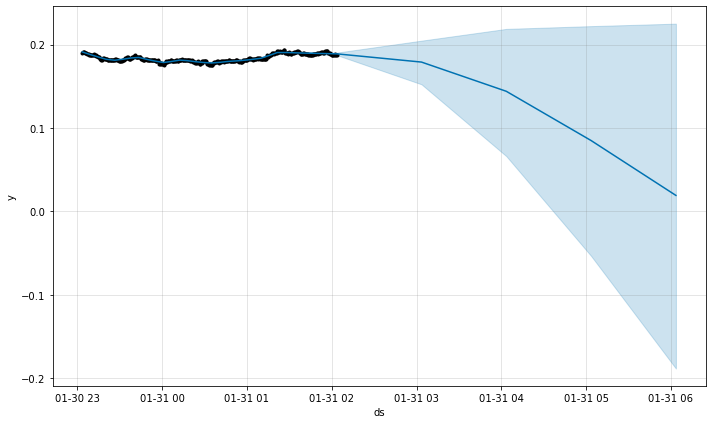

In [17]:
fig1 = m.plot(forecast)

C:\Users\Authority\miniconda3\envs\DSBD_Predictor\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Authority\miniconda3\envs\DSBD_Predictor\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


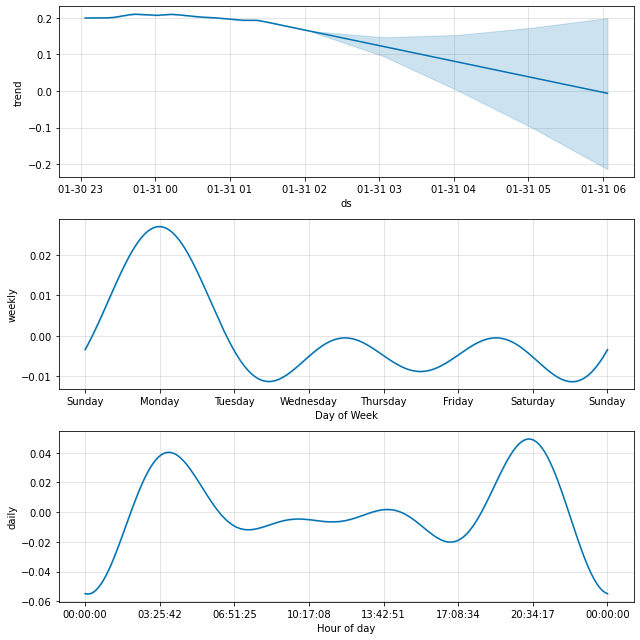

In [18]:
fig2 = m.plot_components(forecast)

<AxesSubplot:xlabel='ds'>

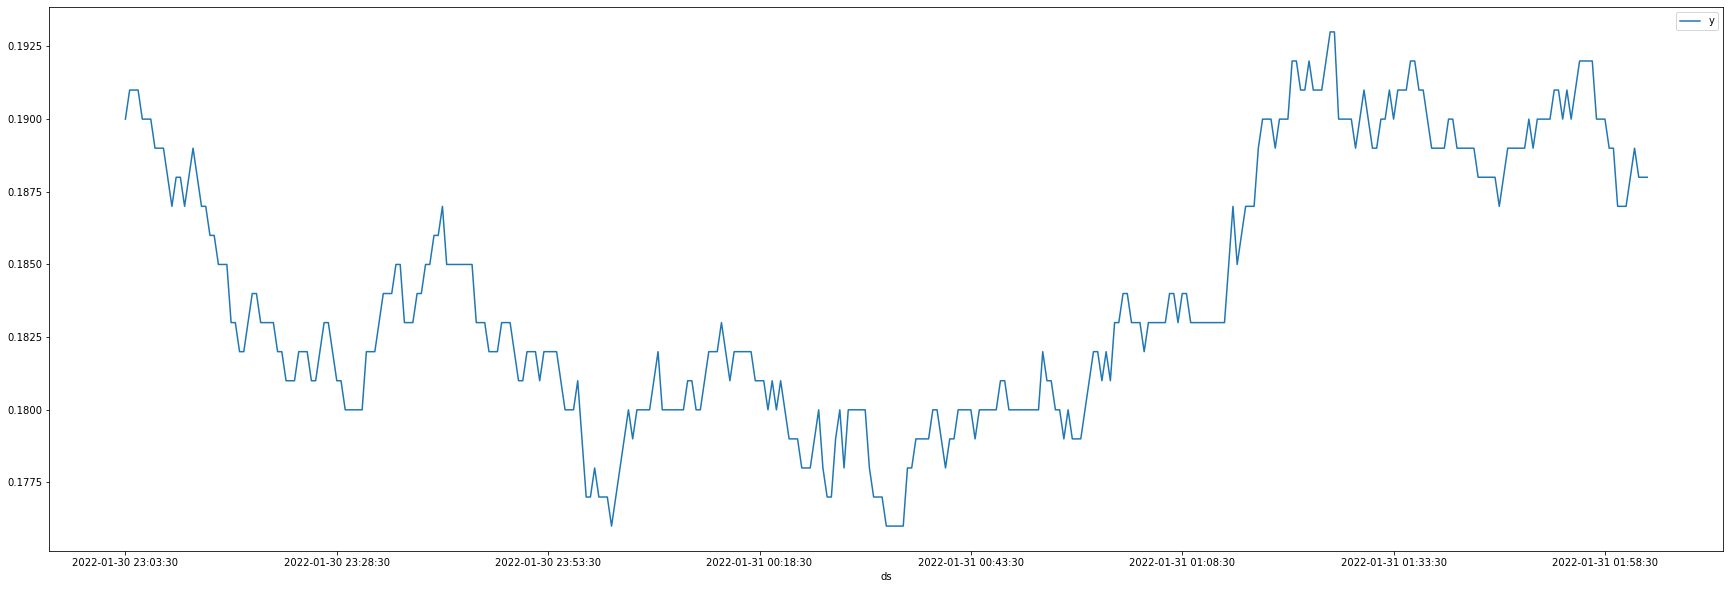

In [10]:
df.plot(x='ds', y='y', figsize=(30,10))